---

# <center>★ AI / ML Research Implementation - AlexNet ★

<center><img src="https://raw.githubusercontent.com/Masterx-AI/AlexNet-Implementation/main/AlexNet.png" style="width: 600px;"/>

---

### Objective:
- Understand the Model Architecture
- Reconstruct the Model Architecture from scratch
- Perform a dry run test to assess it's implemenation on real-time data.

---

### AlexNet Model Description:

AlexNet was first utilized in the public setting when it won the ImageNet Large Scale Visual Recognition Challenge(ILSSVRC 2012 contest). It was at this contest that AlexNet showed that deep convolutional neural network can be used for solving image classification.

AlexNet won the ILSVRC 2012 contest by a margin.

The research paper that detailed the internal components of the CNN architecture also introduced some novel techniques and methods such as efficient computing resource utilization; data augmentation, GPU training, and multiple strategies to prevent overfitting within neural networks.

AlexNet CNN is probably one of the simplest methods to approach understanding deep learning concepts and techniques.

AlexNet is not a complicated architecture when it is compared with some state of the art CNN architectures that have emerged in the more recent years.

AlexNet is simple enough for beginners and intermediate deep learning practitioners to pick up some good practices on model implementation techniques.


---

## <center> Stractegic Plan of Action:
    
**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Dataset Prepration
2. Model Development
3. Model Testing
4. Project Outcomes & Conclusion

---

## <center> 1. Dataset Prepration

In [1]:
#Importing the basic librarires

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Preparing the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preparing the dataset
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

# Building tensorflow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

170508288/170498071 [==============================] - 11s 0us/step


2022-06-26 15:37:54.508136: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()

train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

---

## <center>2. Model Development

In [3]:
# Building the AlexNet Model Architecture

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Compiling the Model
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Checking Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

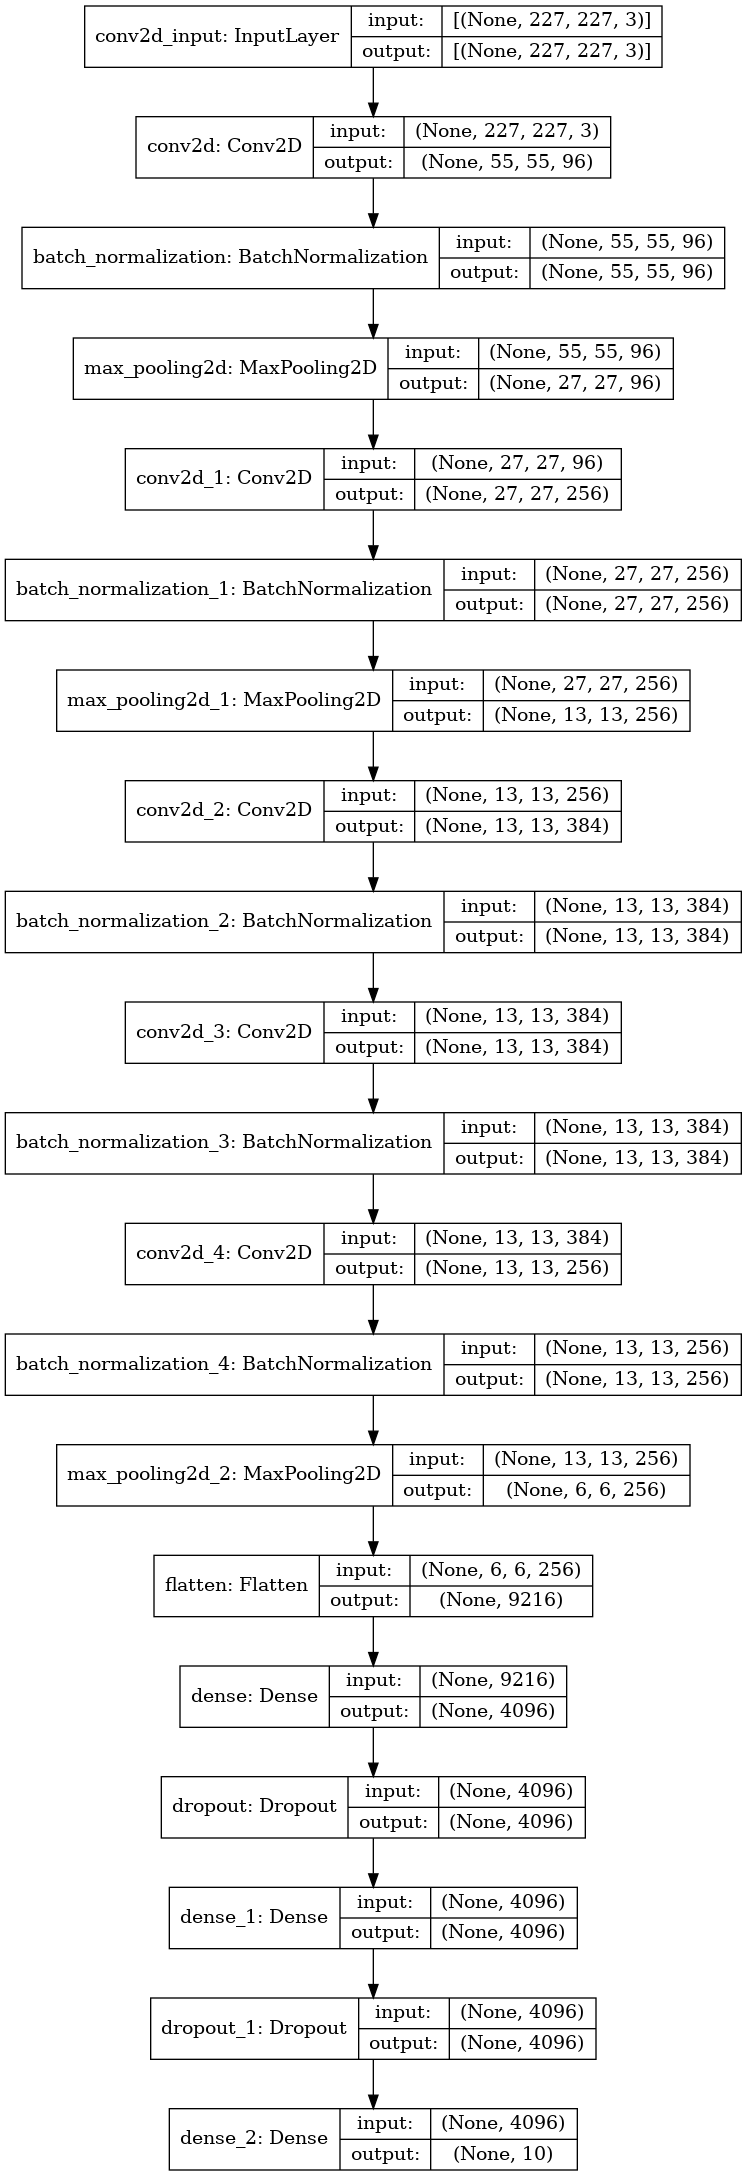

In [4]:
# Plotting the model architecture

keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

---

## <center>3. Model Testing

In [5]:
# Moddel Training

# history = model.fit(train_ds,
#                     epochs=5,
#                     validation_data=validation_ds,
#                     validation_freq=1)

### COMMENTING THE TRAINING CODE AS IT THROWS MEMORY ALLOCATION ERROR

In [6]:
# Model Evaluation

# model.evaluate(test_x, test_y)

---

# <center>4. Project Outcomes & Conclusion

### Here are some of the key outcomes of the project:

- The Model Architecture was reconstructed from scratch with no errors.
- We were able to plot the model graph & observe input & output shapes of all the layers. 
- Also we could identify that the total trainable paramters for the AlexNet-5 model were 58M.
- To demonstrate it's functionality, we have tested the model for just 5 epochs (due to hardware limitations). 
- Despite this, the model has performed surpisingly well achieving high accuracy within few iterations.

In [7]:
#<<<--------------------------------------THE END---------------------------------------->>>